# Lesson: CNN - hometask

In this lesson, you will:
1. Practice to use Keras
2. Build a deep learning algorithm.

Why are we using Keras? Keras was developed to enable deep learning engineers to build and experiment with different models very quickly. Just as TensorFlow is a higher-level framework than Python, Keras is an even higher-level framework and provides additional abstractions. Being able to go from idea to result with the least possible delay is key to finding good models. However, Keras is more restrictive than the lower-level frameworks, so there are some very complex models that you can implement in TensorFlow but not (without more difficulty) in Keras. That being said, Keras will work fine for many common models.

In this hometask, you'll work on the "Happy House" problem, which we'll explain below. Let's load the required packages and solve the problem of the Happy House!

In [1]:
import numpy as np
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model

**Note**: As you can see, we've imported a lot of functions from Keras. You can use them easily just by calling them directly in the notebook e.g.<br> `X = Input(...)` or `X = ZeroPadding2D(...)`.

In [ ]:
from IPython.display import Image, display

In [ ]:
!wget "https://www.dropbox.com/scl/fi/wt1zd43hza8o9pzieio58/image_2_1_2_house-members.png?rlkey=y6z14t2jgc6hvtre7efwvfzk6&dl=0" -O /content/sample_data/image_2_1_2_house-members.png


--2024-02-04 08:58:58--  https://www.dropbox.com/scl/fi/wt1zd43hza8o9pzieio58/image_2_1_2_house-members.png?rlkey=y6z14t2jgc6hvtre7efwvfzk6&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc887b3b66f6c13e7680070c38da.dl.dropboxusercontent.com/cd/0/inline/CMpuhrCkCMPjVmN1OOaZ0tlwcSBpUcIlZ8umIqQIoh0-0lCZlIO0BisOcK59Mua7q9bZeZvm3-3h9wrwqaIEDLhUSy3iXhfhpnXah_Vi5X6sc4sQSMbHIKsl_xejxb2F6MAq2nZaSyrQZjEXhoapjSz9/file# [following]
--2024-02-04 08:58:58--  https://uc887b3b66f6c13e7680070c38da.dl.dropboxusercontent.com/cd/0/inline/CMpuhrCkCMPjVmN1OOaZ0tlwcSBpUcIlZ8umIqQIoh0-0lCZlIO0BisOcK59Mua7q9bZeZvm3-3h9wrwqaIEDLhUSy3iXhfhpnXah_Vi5X6sc4sQSMbHIKsl_xejxb2F6MAq2nZaSyrQZjEXhoapjSz9/file
Resolving uc887b3b66f6c13e7680070c38da.dl.dropboxusercontent.com (uc887b3b66f6c13e7680070c38da.dl.dropboxusercontent.com)..

## 1 - The Happy House

For your next vacation, you decided to spend a week with five of your friends from school. It is a very convenient house with many things to do nearby. But the most important benefit is that everybody has commited to be happy when they are in the house. So anyone wanting to enter the house must prove their current state of happiness.

As a deep learning expert, to make sure the "Happy" rule is strictly applied, you are going to build an algorithm which that uses pictures from the front door camera to check if the person is happy or not. The door should open only if the person is happy.

You have gathered pictures of your friends and yourself, taken by the front-door camera. The dataset is labbeled.


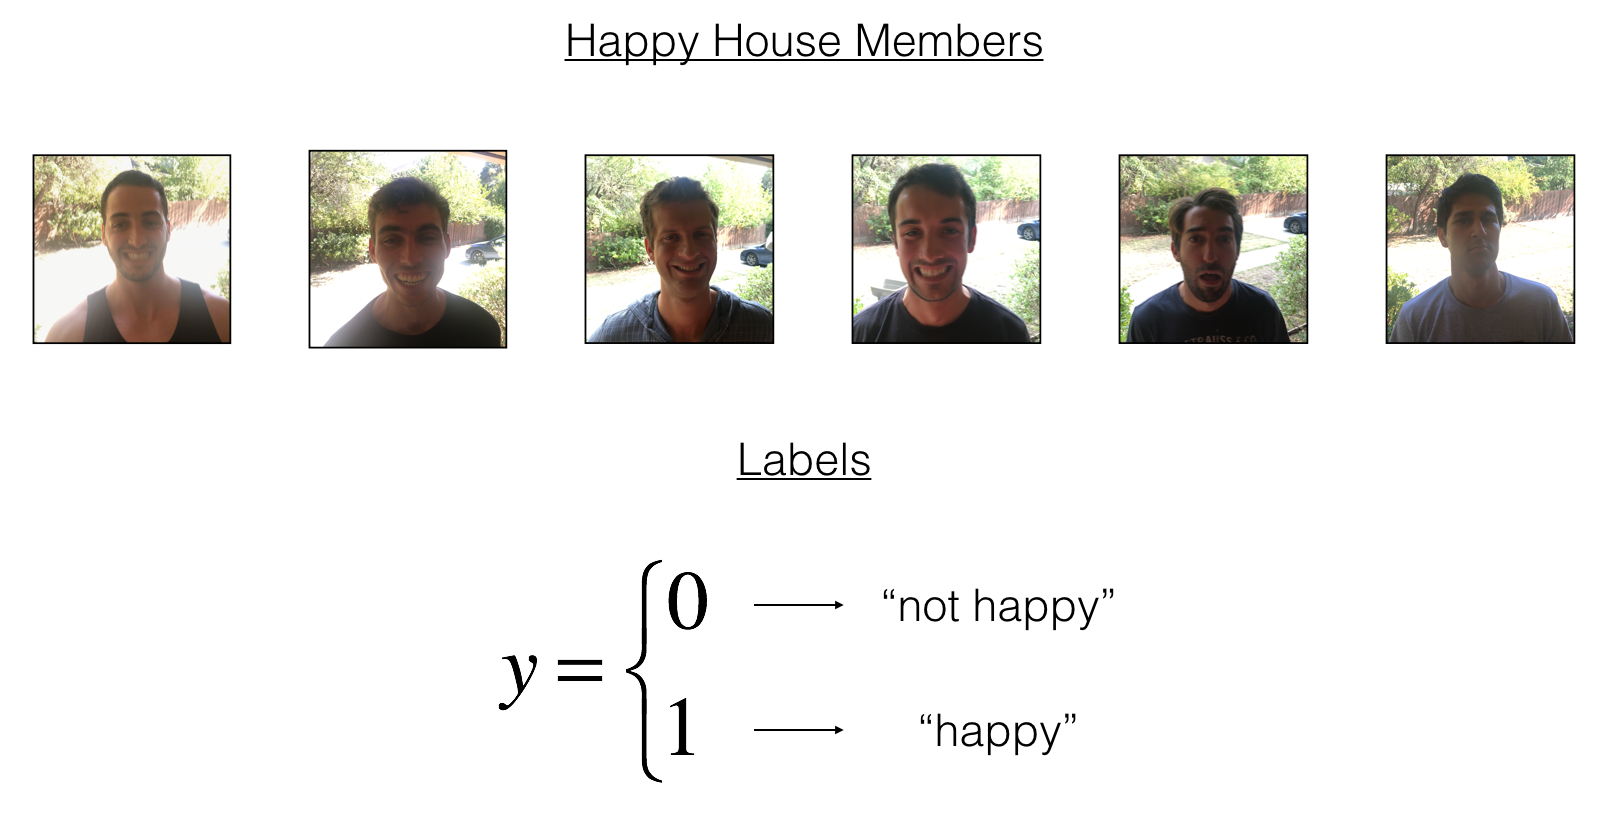

In [ ]:
display(Image("/content/sample_data/image_2_1_2_house-members.png", width=600))

## Load the data

In [2]:
!wget "https://www.dropbox.com/scl/fi/b3n1j4sgb1qtma5l79rw4/train_happy.h5?rlkey=cq84k6ay3sfitllnk1wu2tt3k&dl=0" -O /content/sample_data/train_happy.h5
!wget "https://www.dropbox.com/scl/fi/20z852u9fhd0rmxcmiaq9/test_happy.h5?rlkey=11simxwvxrkcn9dcgmucbdrla&dl=0" -O /content/sample_data/test_happy.h5

--2024-02-05 09:34:58--  https://www.dropbox.com/scl/fi/b3n1j4sgb1qtma5l79rw4/train_happy.h5?rlkey=cq84k6ay3sfitllnk1wu2tt3k&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.13.18, 2620:100:6057:18::a27d:d12
Connecting to www.dropbox.com (www.dropbox.com)|162.125.13.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc981516d9fc49aa1c2409673004.dl.dropboxusercontent.com/cd/0/inline/CMu9DtYv8JbRFvH-ggz-GCCN1UWXnbOpoqeA9NfslK9ERW_rbW5TxkJdKqSm-3chtYh1TPXcPAelfr9o9ZfIVrWxnjcjXX0AVWabDESakwM9mqebGP2QSRGozuie8fzrUuAS2RbV8MzM7jSMBvh30G3V/file# [following]
--2024-02-05 09:34:59--  https://uc981516d9fc49aa1c2409673004.dl.dropboxusercontent.com/cd/0/inline/CMu9DtYv8JbRFvH-ggz-GCCN1UWXnbOpoqeA9NfslK9ERW_rbW5TxkJdKqSm-3chtYh1TPXcPAelfr9o9ZfIVrWxnjcjXX0AVWabDESakwM9mqebGP2QSRGozuie8fzrUuAS2RbV8MzM7jSMBvh30G3V/file
Resolving uc981516d9fc49aa1c2409673004.dl.dropboxusercontent.com (uc981516d9fc49aa1c2409673004.dl.dropboxusercontent.com)... 162.125.3.1

In [3]:
def load_dataset(train_path, test_path):
    train_dataset = h5py.File(train_path, "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File(test_path, "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes




In [4]:
import h5py
train_path = '/content/sample_data/train_happy.h5'
test_path = '/content/sample_data/test_happy.h5'
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset(train_path, test_path)

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


You should see **details of the "Happy" dataset**:
- Images are of shape (64,64,3)
- Training: 600 pictures
- Test: 150 pictures

## 2 - Building a model in Keras

Keras is very good for rapid prototyping. In just a short time you will be able to build a model that achieves outstanding results.

Here is an example of a model in Keras:

```python
def model(input_shape):
    # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='HappyModel')
    
    return model
```

Note that Keras uses a different convention with variable names than we've previously used with numpy and TensorFlow. In particular, rather than creating and assigning a new variable on each step of forward propagation such as `X`, `Z1`, `A1`, `Z2`, `A2`, etc. for the computations for the different layers, in Keras code each line above just reassigns `X` to a new value using `X = ...`. In other words, during each step of forward propagation, we are just writing the latest value in the commputation into the same variable `X`. The only exception was `X_input`, which we kept separate and did not overwrite, since we needed it at the end to create the Keras model instance (`model = Model(inputs = X_input, ...)` above).

**Exercise**: Implement a `HappyModel()`. This assignment is more open-ended than most. We suggest that you start by implementing a model using the architecture we suggest, and run through the rest of this assignment using that as your initial model. But after that, come back and take initiative to try out other model architectures. For example, you might take inspiration from the model above, but then vary the network architecture and hyperparameters however you wish. You can also use other functions such as `AveragePooling2D()`, `GlobalMaxPooling2D()`, `Dropout()`.

**Note**: You have to be careful with your data's shapes. Use what you've learned in the videos to make sure your convolutional, pooling and fully-connected layers are adapted to the volumes you're applying it to.

In [5]:
# GRADED FUNCTION: HappyModel

def HappyModel(input_shape):
    """
    Implementation of the HappyModel.

    Arguments:
    input_shape -- shape of the images of the dataset

    Returns:
    model -- a Model() instance in Keras
    """

    ### START CODE HERE ###
    X_input= None

    # Zero-Padding: pads the border of X_input with zeroes
    X = None

    # CONV -> BN -> RELU Block applied to X
    X = None

    # MAXPOOL
    X = None

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = None

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = None


    ### END CODE HERE ###

    return model

You have now built a function to describe your model. To train and test this model, there are four steps in Keras:
1. Create the model by calling the function above
2. Compile the model by calling `model.compile(optimizer = "...", loss = "...", metrics = ["accuracy"])`
3. Train the model on train data by calling `model.fit(x = ..., y = ..., epochs = ..., batch_size = ...)`
4. Test the model on test data by calling `model.evaluate(x = ..., y = ...)`

If you want to know more about `model.compile()`, `model.fit()`, `model.evaluate()` and their arguments, refer to the official [Keras documentation](https://keras.io/models/model/).




### Implement step 1.

Create the model.

In [6]:
### START CODE HERE ### (1 line)
happyModel = None
### END CODE HERE ###

In [ ]:
# happyModel.summary()

Model: "HappyModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 zero_padding2d (ZeroPaddin  (None, 70, 70, 3)         0         
 g2D)                                                            
                                                                 
 conv0 (Conv2D)              (None, 64, 64, 32)        4736      
                                                                 
 bn0 (BatchNormalization)    (None, 64, 64, 32)        128       
                                                                 
 activation (Activation)     (None, 64, 64, 32)        0         
                                                                 
 max_pool (MaxPooling2D)     (None, 32, 32, 32)        0         
                                                        

You should get the following description of the model

```python
Model: "HappyModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 zero_padding2d (ZeroPaddin  (None, 70, 70, 3)         0         
 g2D)                                                            
                                                                 
 conv0 (Conv2D)              (None, 64, 64, 32)        4736      
                                                                 
 bn0 (BatchNormalization)    (None, 64, 64, 32)        128       
                                                                 
 activation (Activation)     (None, 64, 64, 32)        0         
                                                                 
 max_pool (MaxPooling2D)     (None, 32, 32, 32)        0         
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 fc (Dense)                  (None, 1)                 32769     
                                                                 
=================================================================
Total params: 37633 (147.00 KB)
Trainable params: 37569 (146.75 KB)
Non-trainable params: 64 (256.00 Byte)
_________________________________________________________________
```

### Implement step 2.
Compile the model to configure the learning process. Choose the 3 arguments of `compile()` wisely. Hint: the Happy Challenge is a binary classification problem.

In [ ]:
### START CODE HERE ### (1 line)

### END CODE HERE ###

### Implement step 3.
Train the model. Choose the number of epochs `20` and the batch size `100`

In [ ]:
### START CODE HERE ### (1 line)

### END CODE HERE ###

Epoch 1/20
6/6 [==============================] - 7s 712ms/step - loss: 1.9378 - accuracy: 0.5300
Epoch 2/20
6/6 [==============================] - 5s 893ms/step - loss: 0.6757 - accuracy: 0.7467
Epoch 3/20
6/6 [==============================] - 4s 715ms/step - loss: 0.4130 - accuracy: 0.8300
Epoch 4/20
6/6 [==============================] - 4s 647ms/step - loss: 0.2459 - accuracy: 0.8900
Epoch 5/20
6/6 [==============================] - 5s 815ms/step - loss: 0.2043 - accuracy: 0.9133
Epoch 6/20
6/6 [==============================] - 4s 648ms/step - loss: 0.1546 - accuracy: 0.9333
Epoch 7/20
6/6 [==============================] - 4s 647ms/step - loss: 0.1297 - accuracy: 0.9650
Epoch 8/20
6/6 [==============================] - 5s 794ms/step - loss: 0.1161 - accuracy: 0.9617
Epoch 9/20
6/6 [==============================] - 4s 642ms/step - loss: 0.1083 - accuracy: 0.9667
Epoch 10/20
6/6 [==============================] - 4s 667ms/step - loss: 0.0938 - accuracy: 0.9717
Epoch 11/20
6/6 [==

You should observe the model training progress:

```python
...
Epoch 15/20
6/6 [==============================] - 4s 650ms/step - loss: 0.0660 - accuracy: 0.9817
Epoch 16/20
6/6 [==============================] - 4s 721ms/step - loss: 0.0703 - accuracy: 0.9850
Epoch 17/20
6/6 [==============================] - 5s 706ms/step - loss: 0.0653 - accuracy: 0.9800
Epoch 18/20
6/6 [==============================] - 4s 649ms/step - loss: 0.0666 - accuracy: 0.9817
Epoch 19/20
6/6 [==============================] - 4s 721ms/step - loss: 0.0520 - accuracy: 0.9850
Epoch 20/20
6/6 [==============================] - 5s 694ms/step - loss: 0.0437 - accuracy: 0.9917
```

#### Note:
If you run `fit()` again, the `model` will continue to train with the parameters it has already learnt instead of reinitializing them.

### Implement step 4.

Test(evaluate) the model.

In [ ]:
### START CODE HERE ### (1 line)
preds = None
### END CODE HERE ###

print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

5/5 [==============================] - 0s 55ms/step - loss: 0.3599 - accuracy: 0.8933

Loss = 0.35992762446403503
Test Accuracy = 0.8933333158493042



You should get the following evaluation output:

```python
5/5 [==============================] - 0s 55ms/step - loss: 0.3599 - accuracy: 0.8933

Loss = 0.35992762446403503
Test Accuracy = 0.8933333158493042
```

You should have observed much better than random-guessing (50%) accuracy on the train and test sets.

To give you a point of comparison, our model gets around **95% test accuracy in 40 epochs** (and 99% train accuracy) with a mini batch size of 16 and "adam" optimizer. But our model gets decent accuracy after just 2-5 epochs, so if you're comparing different models you can also train a variety of models on just a few epochs and see how they compare.

If you have not yet achieved a very good accuracy (let's say more than 80%), here're some things you can play around with to try to achieve it:

- Try using blocks of CONV->BATCHNORM->RELU such as:
```python
X = Conv2D(32, (3, 3), strides = (1, 1), name = 'conv0')(X)
X = BatchNormalization(axis = 3, name = 'bn0')(X)
X = Activation('relu')(X)
```
until your height and width dimensions are quite low and your number of channels quite large (≈32 for example). You are encoding useful information in a volume with a lot of channels. You can then flatten the volume and use a fully-connected layer.
- You can use MAXPOOL after such blocks. It will help you lower the dimension in height and width.
- Change your optimizer. We find Adam works well.
- If the model is struggling to run and you get memory issues, lower your batch_size (12 is usually a good compromise)
- Run on more epochs, until you see the train accuracy plateauing.

Even if you have achieved a good accuracy, please feel free to keep playing with your model to try to get even better results.

**Note**: If you perform hyperparameter tuning on your model, the test set actually becomes a dev set, and your model might end up overfitting to the test (dev) set. But just for the purpose of this assignment, we won't worry about that here.
